In [3]:
import pandas as pd

# Load the data into a DataFrame
data = pd.DataFrame({
    'fname': ['D1637.csv', 'D3623.csv', 'D2052.csv'],
    'ridge': [213.6424790639956, 23.471511196478854, 278.1736514371045],
    'rf': [399.7434399360386, 21.909338845980628, 246.05456508084913],
    'lr': [328.13015719957764, 23.458339123422927, 1021.3379215558153],
    'gb': [324.6837776527416, 13.316002859793807, 201.68284139234498],
    'xbg': [171.72682525315656, 13.091185295176492, 213.24991156464426],
    'dt': [209.61866471734893, 13.143518518518519, 233.5690476190476],
    'lasso': [213.81144663820297, 15.873608561416505, 191.83655337109718],
    'enr': [220.67450235736078, 15.826042073340314, 230.55866829443954],
    'knn': [505.2280701754386, 32.903087201251495, 649.1380952380953]
})

# Set the dataset identifier as the index
data.set_index('fname', inplace=True)

# Rank each model's performance (lower MAE = better performance, so rank ascending)
ranked_data = data.rank(axis=1, method='average', ascending=True)

# Calculate the average rank for each model across all datasets
average_ranks = ranked_data.mean(axis=0).sort_values()

# print("Average Ranks for Each Model:\n", average_ranks)
average_ranks

xbg      1.666667
dt       3.000000
lasso    3.333333
gb       3.666667
enr      4.333333
ridge    6.000000
rf       6.666667
lr       7.666667
knn      8.666667
dtype: float64

In [2]:
ranked_data

,ridge,rf,lr,gb,xbg,dt,lasso,enr,knn
fname,,,,,,,,,
D1637.csv,3.0,8.0,7.0,6.0,1.0,2.0,4.0,5.0,9.0
D3623.csv,8.0,6.0,7.0,3.0,1.0,2.0,5.0,4.0,9.0
D2052.csv,7.0,6.0,9.0,2.0,3.0,5.0,1.0,4.0,8.0


In [4]:
data

,ridge,rf,lr,gb,xbg,dt,lasso,enr,knn
fname,,,,,,,,,
D1637.csv,213.642479,399.743440,328.130157,324.683778,171.726825,209.618665,213.811447,220.674502,505.228070
D3623.csv,23.471511,21.909339,23.458339,13.316003,13.091185,13.143519,15.873609,15.826042,32.903087
D2052.csv,278.173651,246.054565,1021.337922,201.682841,213.249912,233.569048,191.836553,230.558668,649.138095


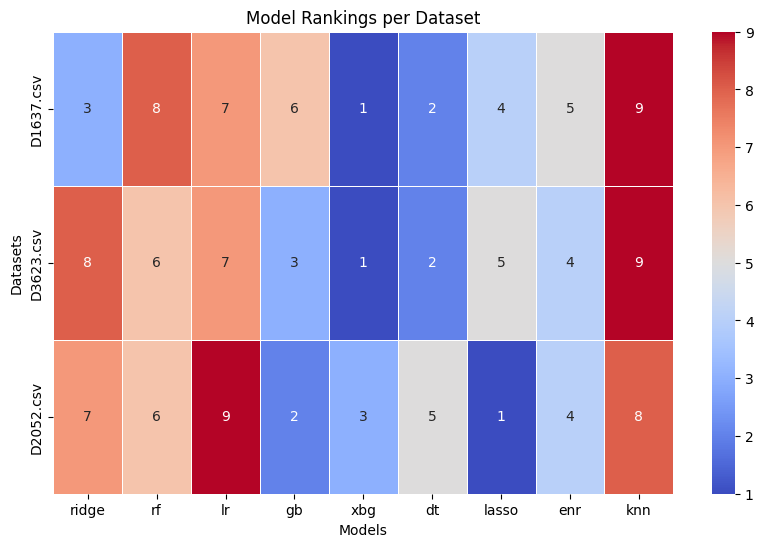

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of ranked models
plt.figure(figsize=(10, 6))
sns.heatmap(ranked_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Model Rankings per Dataset')
plt.xlabel('Models')
plt.ylabel('Datasets')
plt.show()

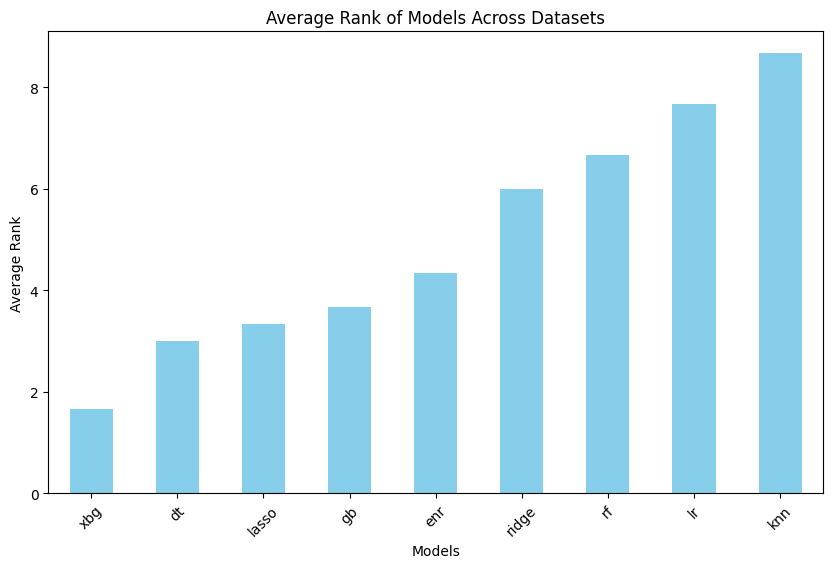

In [6]:
average_ranks.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Rank of Models Across Datasets')
plt.ylabel('Average Rank')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.show()

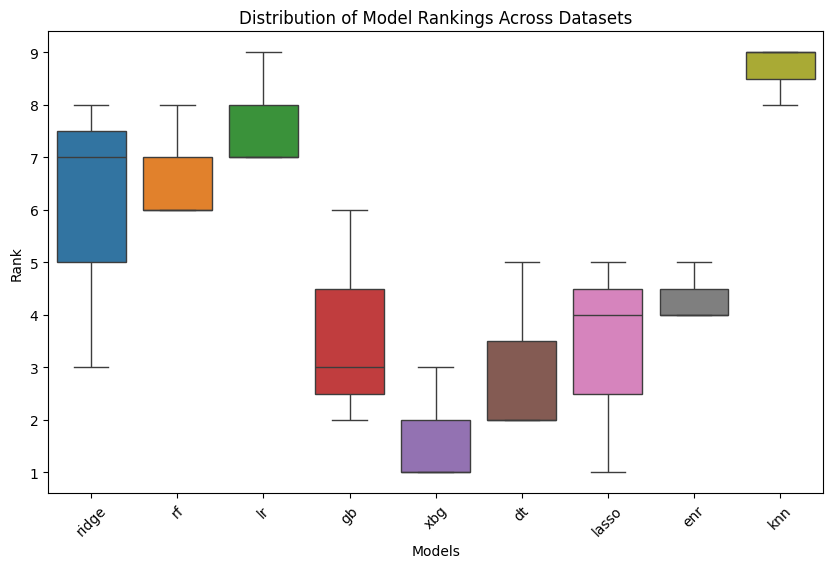

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ranked_data)
plt.title('Distribution of Model Rankings Across Datasets')
plt.xlabel('Models')
plt.ylabel('Rank')
plt.xticks(rotation=45)
plt.show()


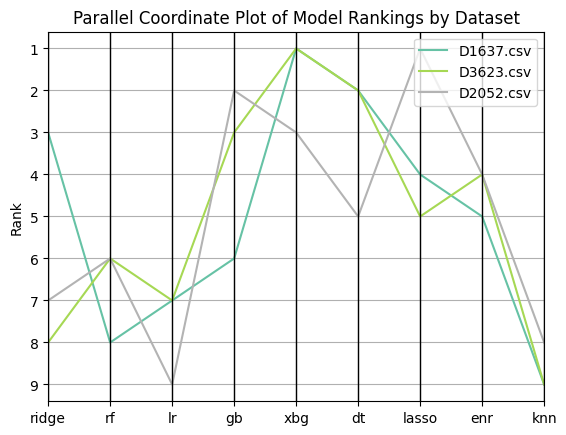

In [11]:
from pandas.plotting import parallel_coordinates

# Add a column for the dataset to use in parallel_coordinates
ranked_data['dataset'] = ranked_data.index
parallel_coordinates(ranked_data, class_column='dataset', colormap=plt.get_cmap("Set2"))
plt.title('Parallel Coordinate Plot of Model Rankings by Dataset')
plt.ylabel('Rank')
plt.gca().invert_yaxis()
plt.show()
